In [1]:
#importing libraries

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string
import pandas as pd
import warnings
from nltk.tokenize import word_tokenize
warnings.filterwarnings("ignore")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:/ML/python/data/labeled_data.csv',delimiter=',')

df.dtypes



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Unnamed: 0             int64
count                  int64
hate_speech            int64
offensive_language     int64
neither                int64
class                  int64
tweet                 object
dtype: object

In [2]:
df.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [3]:
df.drop(['Unnamed: 0','count'],axis=1,inplace=True)
df.duplicated().sum()

0

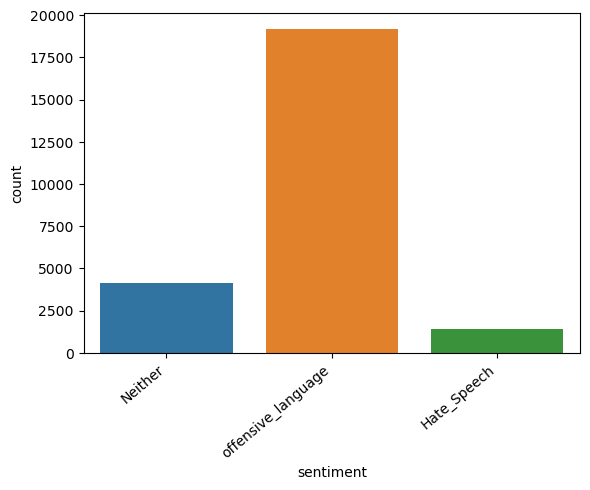

In [4]:
df['sentiment'] = df['class'].map({0:'Hate_Speech',1:'offensive_language',
                                  2: 'Neither'})


fig, axs = plt.subplots(figsize=(6,5)) 
sns.countplot(x='sentiment',data=df,ax=axs)
axs.set_xticklabels(axs.get_xticklabels(),rotation=40,ha="right")
plt.tight_layout()
plt.show()


In [5]:
def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub('<.*?>+', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('rt', '',text)
    text = re.sub('\d', '',text)
    text = re.sub('\w*\d\w*', '', text)
    
    text = re.sub('  ',' ',text)
    

    
    return text


df['tweet'] = df['tweet'].apply(clean_text)
df['tweet'].head(10)

0     mayasolovely as a woman you shouldnt complain...
1     mleew boy dats coldtyga dwn bad for cuffin da...
2     urkindofbrand dawg sbabylife you ever fuck a ...
3          cganderson vivabased she look like a tranny
4     shenikarobes the shit you hear about me might...
5    tmadisonx the shit just blows meclaim you so f...
6    brighterdays i can not just sit up and hate on...
7    selfiequeenbri cause im tired of you big bitch...
8     amp you might not get ya bitch back amp thats...
9     rhythmixx hobbies include fighting mariam\n\n...
Name: tweet, dtype: object

In [6]:
sw = set(stopwords.words("english"))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)


df['tweet'] = df['tweet'].apply(remove_stopwords)
df['tweet'].head(10)

0    mayasolovely woman shouldnt complain cleaning ...
1    mleew boy dats coldtyga dwn bad cuffin dat hoe...
2    urkindofbrand dawg sbabylife ever fuck bitch s...
3                cganderson vivabased look like tranny
4    shenikarobes shit hear might true might faker ...
5    tmadisonx shit blows meclaim faithful somebody...
6    brighterdays sit hate another bitch got much s...
7    selfiequeenbri cause im tired big bitches comi...
8                amp might get ya bitch back amp thats
9      rhythmixx hobbies include fighting mariam bitch
Name: tweet, dtype: object

In [7]:
lemma = WordNetLemmatizer()

def lemmatization(text):
    tokens = word_tokenize(text)
    lemma_tokens = [lemma.lemmatize(token) for token in tokens]
    return " ".join(lemma_tokens)


df['tweet'] = df['tweet'].apply(lemmatization)

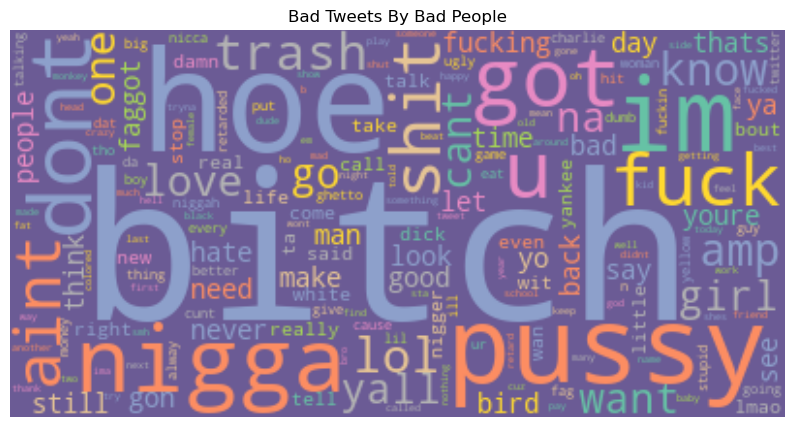

In [8]:
# I DO NOT FIND THIS FUNNY, This is just what people say on Twitter (X) or whatever
from wordcloud import WordCloud

text = " ".join(i for i in df.tweet)

wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bad Tweets By Bad People")
plt.show()


In [9]:
#I did not come up with this
# I did not say this
# this is public domain
# I did not say these words
#these people did and shame you them(you possibly)


print(text.count("bitch"))
print(text.count("bitches"))
print(text.count("nigga"))
print(text.count("niggas"))
print(text.count("hoe"))
print(text.count("trash"))
print(text.count("pussy"))
print(text.count("fuck"))
print(text.count("fucking"))
print(text.count("love"))
print(text.count("faggot"))

11597
49
2489
25
4561
1188
2287
2754
654
951
547


In [10]:

Hate_tweet = (df['sentiment'] == "Hate_Speech").astype('int32')
Hate_tweet.describe()

count    24783.000000
mean         0.057701
std          0.233182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: sentiment, dtype: float64

In [11]:

offensive_tweets = (df['sentiment'] == "offensive_language").astype('int32')
offensive_tweets.describe()

neither = (df['sentiment'] == "Neither").astype('int32')
neither.value_counts()

sentiment
0    20620
1     4163
Name: count, dtype: int64

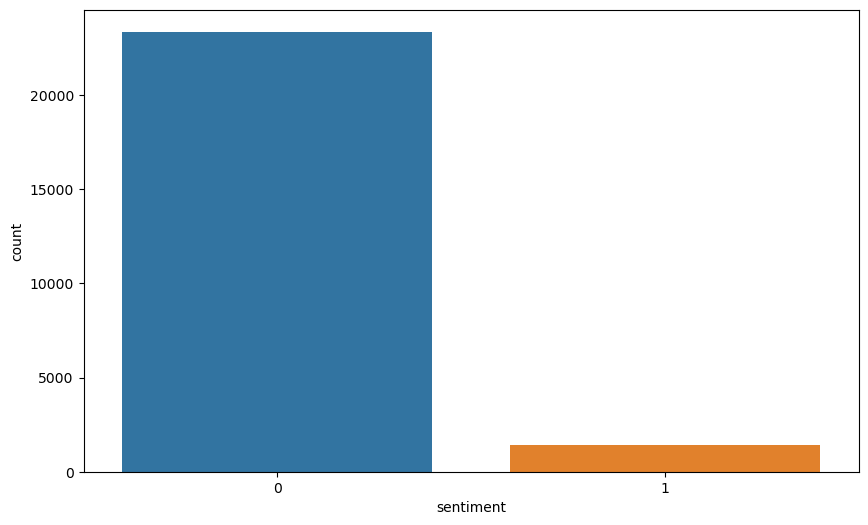

In [14]:

#ok, more uncessary hatred


plt.figure(figsize=(10,6))
sns.countplot(x=Hate_tweet)
plt.xticks()
plt.show()

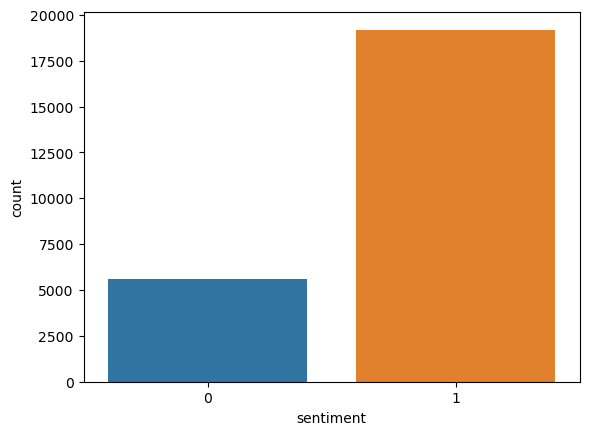

In [15]:
sns.countplot(x=offensive_tweets)
plt.show()


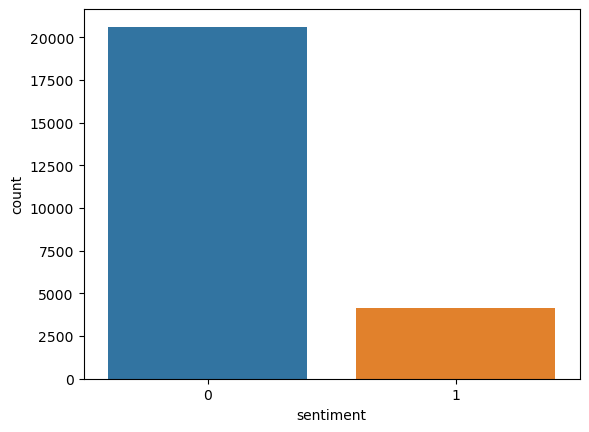

In [16]:
sns.countplot(x=neither)
plt.show()


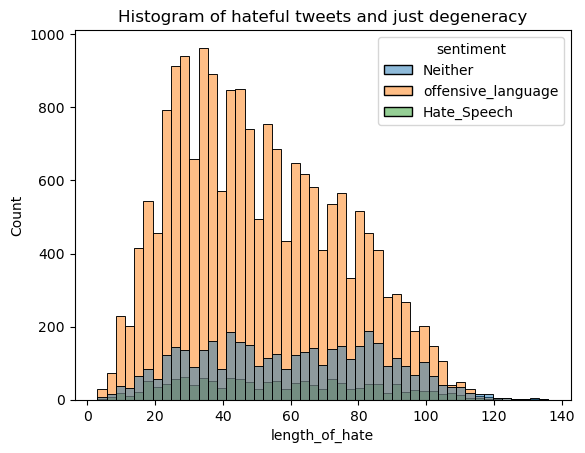

In [17]:
df['length_of_hate'] = df['tweet'].apply(len)

sns.histplot(x='length_of_hate',hue='sentiment',data=df)
plt.title('Histogram of hateful tweets and just degeneracy')
plt.show()


In [18]:
#first train/test split using scikit-learn, no keras at first
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_ = df['tweet']
X_ = cv.fit_transform(X_).toarray()
y_ = df['class']


X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=.20,random_state=42)


from sklearn.naive_bayes import MultinomialNB,BernoulliNB
BNB = BernoulliNB()
MNB = MultinomialNB()


from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier
lr = LogisticRegression()
PA = PassiveAggressiveClassifier()


from sklearn.metrics import accuracy_score,classification_report


def evaluate_model(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}%; --Clf RPT-- {clf_rpt}')
    return pred

lr_pred = evaluate_model(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_model(X_train, X_test, y_train, y_test, PA)
MNB_pred = evaluate_model(X_train, X_test, y_train, y_test, MNB)
BNB_pred = evaluate_model(X_train, X_test, y_train, y_test, BNB)


LogisticRegression, --Accuracy-- 89.65%; --Clf RPT--               precision    recall  f1-score   support

           0       0.46      0.21      0.29       290
           1       0.93      0.95      0.94      3832
           2       0.83      0.88      0.85       835

    accuracy                           0.90      4957
   macro avg       0.74      0.68      0.69      4957
weighted avg       0.88      0.90      0.89      4957

PassiveAggressiveClassifier, --Accuracy-- 86.91%; --Clf RPT--               precision    recall  f1-score   support

           0       0.36      0.29      0.32       290
           1       0.91      0.93      0.92      3832
           2       0.80      0.78      0.79       835

    accuracy                           0.87      4957
   macro avg       0.69      0.67      0.68      4957
weighted avg       0.86      0.87      0.87      4957

MultinomialNB, --Accuracy-- 86.50%; --Clf RPT--               precision    recall  f1-score   support

           0       0

In [19]:
#time for keras tokenizer


X = df['tweet']
y = df['class']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.15, random_state=42)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Embedding, Dense,SpatialDropout1D,Bidirectional
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

In [20]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length


print(max_length)

25


In [21]:
from tensorflow.keras.utils import pad_sequences

X_train = pad_sequences(X_train,25,padding='post')
X_test = pad_sequences(X_test,25,padding='post')




RNN = Sequential()
RNN.add(Embedding(len(word_index) + 1, output_dim=25, input_length=25))
RNN.add(SpatialDropout1D(0.2))
RNN.add(Bidirectional(LSTM(25, dropout=0.2,recurrent_dropout=0.2)))
RNN.add(Dense(3, activation='sigmoid'))
RNN.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
batch_size = 64

history = RNN.fit(X_train,y_train,batch_size=batch_size,epochs=10,validation_split=0.1)
results = RNN.evaluate(X_test,y_test)
pred = RNN.predict(X_test)
print(results)
print("Max Accuracy: ",max(history.history['accuracy']))
print("Max vallidation accuracy: ",max(history.history['val_accuracy']))

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.7646 - loss: 0.4314 - val_accuracy: 0.8956 - val_loss: 0.2069
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8965 - loss: 0.2045 - val_accuracy: 0.9051 - val_loss: 0.1881
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9168 - loss: 0.1668 - val_accuracy: 0.9084 - val_loss: 0.1859
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9264 - loss: 0.1409 - val_accuracy: 0.9013 - val_loss: 0.1951
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9373 - loss: 0.1146 - val_accuracy: 0.8951 - val_loss: 0.2040
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9611 - loss: 0.0831 - val_accuracy: 0.8975 - val_loss: 0.2223
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9698 - loss: 0.0652 - val_accuracy: 0.8904 - val_loss: 0.2278
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9775 - loss: 0.0523 - val

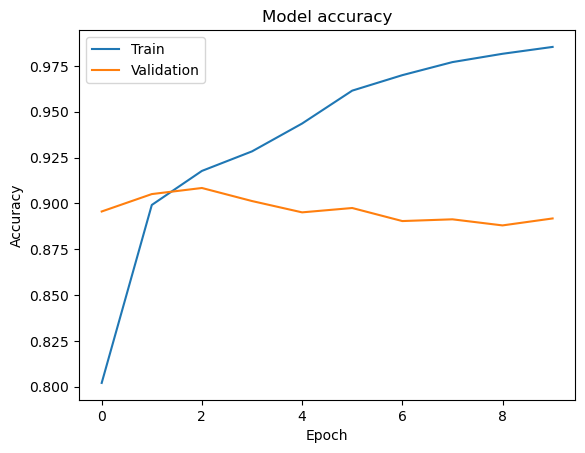

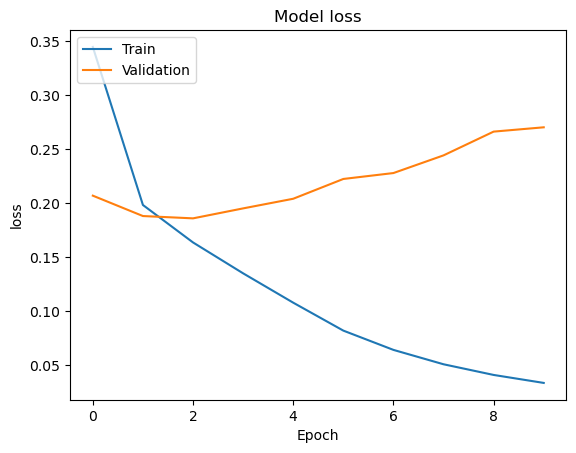

In [22]:
#training and val accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#training and evaluation results by loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




